In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



In [3]:
J = 1
d = 0.01
MU = np.arange(-3, 3, d)
MU = MU.flatten()
Delta = np.arange(0.2, 1.4, 0.2)

In [4]:
O = np.zeros((np.size(MU),np.size(Delta)))
N = 4000
kappa = 0
k = np.arange(2 * np.pi / N, np.pi - 2 * np.pi / N, 2 * np.pi / N)

step_delta = 0
total_step_mu = len(MU)
total_step_delta = len(Delta)
while step_delta< total_step_delta:
    step_mu = 0
    while step_mu < total_step_mu:
        mu = MU[step_mu]
        delta = Delta[step_delta]
        a = J * np.cos(k) - mu
        b = delta * np.sin(k)
        c = b / a
        A = (a * b / (a * a + b * b))
        O[step_mu,step_delta] = np.sum(np.abs(A)) / N
        step_mu +=1
    step_delta +=1




In [5]:
mu_range = [[1.5, 0.2], [0, 0.2], [0, 1.2], [1.5, 1.2]]
Time_range = np.arange(0, 40, 0.05)
time_length = len(Time_range)
N = 500
zetaT = np.zeros((time_length, 4))
zetaT_average = np.zeros((time_length, 4))

dappa = 0
k = np.arange(2 * np.pi / N, np.pi - 2 * np.pi / N, 2 * np.pi / N)
step_md = 0

while step_md<4:
    [mu,delta] = mu_range[step_md]
    a = J * np.cos(k) - mu
    b = delta * np.sin(k)
    c = b / a
    E = 2 * np.sqrt(a * a + b * b)
    A = (a * b / (a * a + b * b))
    step_time = 0
    while step_time < time_length:
        t = Time_range[step_time]
        zetaK = np.abs(A) * (np.sin(E * t)) * (np.sin(E * t))
        zetaT[step_time, step_md] = np.sum(zetaK) / N * 2
        zetaT_average [step_time, step_md] = np.sum(zetaT[:, step_md])/(step_time+1)
        step_time = step_time + 1
    step_md +=1


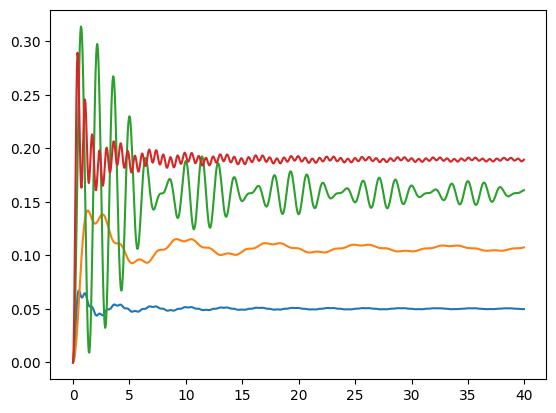

In [6]:
plt.plot(Time_range,zetaT[:,:])

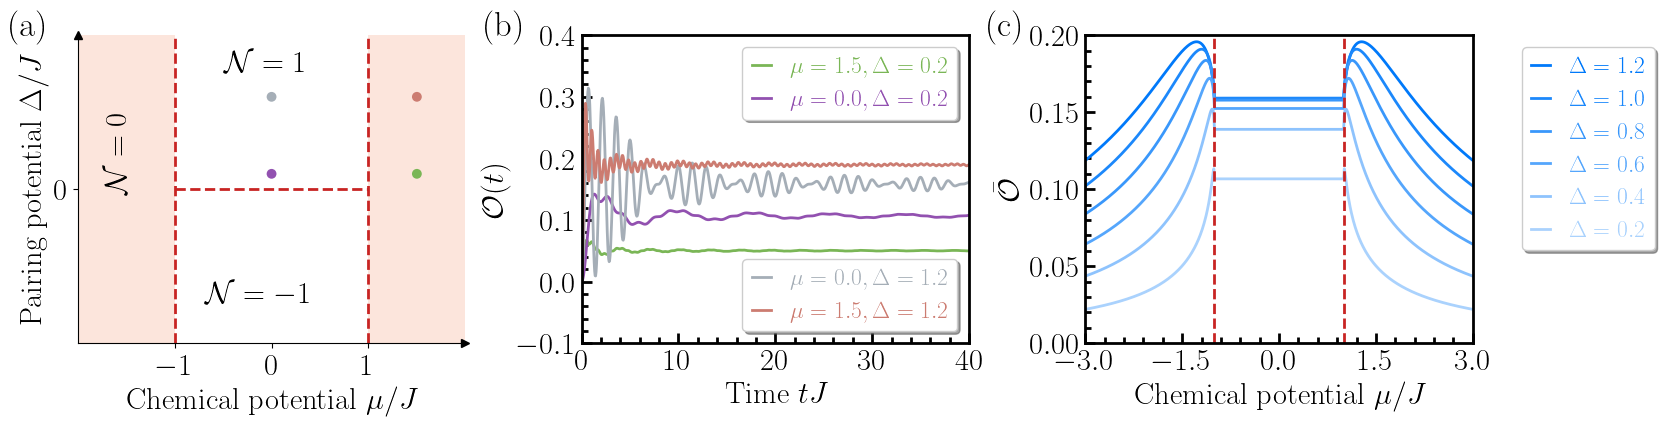

In [7]:
plt.rcParams.update({
    "text.usetex": True,             # 启用 LaTeX 渲染
    "font.family": "serif",          # sans-serif:标题不会改成latex字体serif:标题会变成latex
    "font.serif": ["Computer Modern"],  # 使用 Computer Modern 字体
    "text.latex.preamble": r"\usepackage{amsmath}"  # 如果需要数学包
})
font_size = 22
C1 = ['#2878B5','#9AC9DB','#F8AC8C', '#C82423']
C2 = ['#7AB656','#9251B0','#A5AEB7', '#CC7C71']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
C = ['#0079fa','#1c88fb','#3997fb','#55a6fc','#8ec3fd','#aad2fd']



gList1 = np.linspace(-1, -1, num=200)
gList2 = np.linspace(1, 1, num=200)
gList3 = np.linspace(-1, 1, num=200)
temp1 = np.linspace(-2, 2, num=200)
temp2 = np.linspace(0, 0, num=200)
X = [1.5,0,0,1.5]
Y = [0.2,0.2,1.2,1.2]
axs[0].spines["left"].set_position(("data", -2))
axs[0].spines["bottom"].set_position(("data", -2))
axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')
axs[0].scatter(X, Y,s =50,c = C2,linewidths=0,edgecolors='k', zorder=2)
axs[0].plot(gList1, temp1, lw=2, c=C1[3],ls = '--', alpha=1)
axs[0].plot(gList2, temp1, lw=2, c=C1[3],ls = '--', alpha=1)
axs[0].plot(gList3, temp2, lw=2, c=C1[3],ls = '--', alpha=1)
# for i in range(6):
#     axs[0].plot(MU[:], Delta[5-i]*np.ones([len(MU)]),lw = 2, color=C[i])
axs[0].axvspan(-3,-1, facecolor=C1[2], alpha=0.3)
axs[0].axvspan(1,3, facecolor=C1[2], alpha=0.3)
# axs[0].axvspan(-1, 1,0.5,1, facecolor=C1[0], alpha=1)
# axs[0].axvspan(-1, 1,0,0.5, facecolor=C1[1], alpha=0.3)

# axs[0].text(1.5, 0.2, 'a', fontsize=font_size)
# axs[0].text(0, 0.2, 'b', fontsize=font_size)
# axs[0].text(0, 1.8, 'c', fontsize=font_size)
# axs[0].text(1.5, 1.8, 'd', fontsize=font_size)
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_xticks([-1,0,1])
axs[0].set_yticks([0])
axs[0].set_xticklabels([r'$-1$',r'$0$',r'$1$'], fontsize=font_size)
axs[0].set_yticklabels([r'$0$'], fontsize=font_size)
axs[0].set_xlabel('Chemical potential $\mu/J$', fontsize = font_size)
axs[0].set_ylabel('Pairing potential $\Delta/J$', fontsize = font_size)
axs[0].plot(2, -2, ">k", clip_on=False)
axs[0].plot(-2, 2, "^k", clip_on=False)
axs[0].text(-0.5, 1.5, '$\mathcal{N}=1$', fontsize=font_size)
axs[0].text(-0.7, -1.5, '$\mathcal{N}=-1$', fontsize=font_size)
axs[0].text(-1.7, 0, '$\mathcal{N}=0$', fontsize=font_size, rotation=90)

p1, = axs[1].plot(Time_range,zetaT[:,0],c = C2[0],lw = 2, label="$\mu =%.1f,\Delta = %.1f $"%(mu_range[0][0],mu_range[0][1]))
p2, = axs[1].plot(Time_range,zetaT[:,1],c = C2[1],lw = 2, label="$\mu =%.1f,\Delta = %.1f $"%(mu_range[1][0],mu_range[1][1]))
p3, = axs[1].plot(Time_range,zetaT[:,2],c = C2[2],lw = 2, label="$\mu =%.1f,\Delta = %.1f $"%(mu_range[2][0],mu_range[2][1]))
p4, = axs[1].plot(Time_range,zetaT[:,3],c = C2[3],lw = 2, label="$\mu =%.1f,\Delta = %.1f $"%(mu_range[3][0],mu_range[3][1]))
axs[1].xaxis.set_major_locator(MultipleLocator(10))
axs[1].yaxis.set_major_locator(MultipleLocator(0.1))
axs[1].xaxis.set_minor_locator(MultipleLocator(2))
axs[1].yaxis.set_minor_locator(MultipleLocator(0.02))
axs[1].set_xlabel(r'Time $tJ $', size=font_size)
axs[1].set_ylabel(r'${\mathcal{O}}(t) $', size=font_size)
axs[1].tick_params(labelsize=font_size)
label = axs[1].legend([p1,p2], ["$\mu =%.1f,\Delta = %.1f $"%(mu_range[0][0],mu_range[0][1]),"$\mu =%.1f,\Delta = %.1f $"%(mu_range[1][0],mu_range[1][1])]\
                    ,loc='upper right' , prop={'size': font_size-5}, shadow=True, handleheight=0.5, handlelength=0.8)

x = 0
for text in label.get_texts():
    text.set_color(C2[x])
    x +=1
axs  [1].add_artist(label)
label =axs[1].legend([p3,p4], ["$\mu =%.1f,\Delta = %.1f $"%(mu_range[2][0],mu_range[2][1]),"$\mu =%.1f,\Delta = %.1f $"%(mu_range[3][0],mu_range[3][1])]\
                  ,loc='lower right', prop={'size': font_size-5}, shadow=True, handleheight=0.5, handlelength=0.8)
x = 0
for text in label.get_texts():
    text.set_color(C2[x+2])
    x +=1

axs[1].set_ylim([-0.1,0.4])
axs[1].set_xlim([0,40])



for i in range(6):
    axs[2].plot(MU[:], O[:,5-i],lw = 2, label="$\Delta =%.1f $"%(Delta[5-i]), color=C[i])
label = axs[2].legend(loc=1, bbox_to_anchor=(1.5,1), prop={'size': font_size-5}, shadow=True, handleheight=0.5, handlelength=0.8)
x = 0
for text in label.get_texts():
    text.set_color(C[x])
    x +=1
axs[2].xaxis.set_major_locator(MultipleLocator(1.5))
axs[2].yaxis.set_major_locator(MultipleLocator(0.05))
axs[2].xaxis.set_minor_locator(MultipleLocator(0.3))
axs[2].yaxis.set_minor_locator(MultipleLocator(0.01))
axs[2].set_ylabel(r'$\bar{\mathcal{O}} $', size=font_size)
axs[2].set_xlabel(r'Chemical potential $\mu / J$', size=font_size)
axs[2].tick_params(labelsize=font_size)

axs[2].set_ylim([0,0.2])
axs[2].set_xlim([-3,3])

y = np.linspace(0,0.2,10)
x = -1*np.ones([1,10])
x = x.flatten()
axs[2].plot(x,y,ls = '--',lw = 2,color = C1[3])
y = np.linspace(0,0.2,10)
x = 1*np.ones([1,10])
x = x.flatten()
axs[2].plot(x,y,ls = '--',lw = 2,color = C1[3])
for i in [1,2]:
    axs[i].tick_params(which='minor',direction='in', length=4,width=2,axis = "both")
    axs[i].tick_params(which='major',direction='in', length=7,width=2,labelsize=font_size,axis = "both")
    axs[i].spines['bottom'].set_linewidth(2)
    axs[i].spines['top'].set_linewidth(2)
    axs[i].spines['right'].set_linewidth(2)
    axs[i].spines['left'].set_linewidth(2)
plt.subplots_adjust(wspace=0.3, hspace =0.45)
x1 = -3
y1 = 1.1
x2 = 0.25
axs[0].text(-2.7, 2, '(a)', fontsize=font_size + 3)
axs[1].text(-10, 0.4, '(b)', fontsize=font_size + 3)
axs[2].text(-4.5, 0.2, '(c)', fontsize=font_size + 3)
plt.savefig('fig2.pdf',transparent = True,bbox_inches = 'tight')

## fig3

C:\Users\shiyubo\AppData\Local\Temp\ipykernel_67496\3842481527.py:16: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(1+delta**2-x1**2)
C:\Users\shiyubo\AppData\Local\Temp\ipykernel_67496\3842481527.py:18: RuntimeWarning: invalid value encountered in sqrt
  y3 = -np.sqrt(1+delta**2-x1**2)
C:\Users\shiyubo\AppData\Local\Temp\ipykernel_67496\3842481527.py:42: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(1+delta**2-x1**2)
C:\Users\shiyubo\AppData\Local\Temp\ipykernel_67496\3842481527.py:44: RuntimeWarning: invalid value encountered in sqrt
  y3 = -np.sqrt(1+delta**2-x1**2)


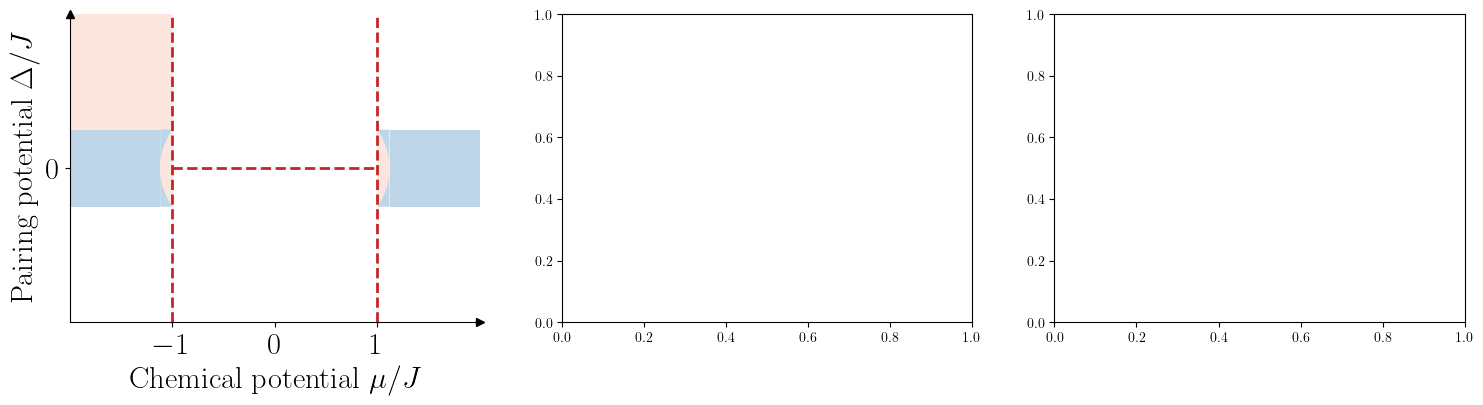

In [173]:
plt.rcParams.update({
    "text.usetex": True,             # 启用 LaTeX 渲染
    "font.family": "serif",          # sans-serif:标题不会改成latex字体serif:标题会变成latex
    "font.serif": ["Computer Modern"],  # 使用 Computer Modern 字体
    "text.latex.preamble": r"\usepackage{amsmath}"  # 如果需要数学包
})
font_size = 22
C1 = ['#2878B5','#9AC9DB','#F8AC8C', '#C82423']
C2 = ['#7AB656','#9251B0','#A5AEB7', '#CC7C71']
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
C = ['#0079fa','#1c88fb','#3997fb','#55a6fc','#8ec3fd','#aad2fd']

delta = 0.5
theta = np.linspace(0, 2*np.pi, num=200)
x1 = np.linspace(-(np.sqrt(1+delta**2)), -1, num=200)
y1 = np.sqrt(1+delta**2-x1**2)
y2 = delta*np.ones([200])
y3 = -np.sqrt(1+delta**2-x1**2)
y4 = -delta*np.ones([200])
# x2 = np.linspace(-3, -1, num=200)
x2 = -x1

gList1 = np.linspace(-1, -1, num=200)
gList2 = np.linspace(1, 1, num=200)
gList3 = np.linspace(-1, 1, num=200)
temp1 = np.linspace(-2, 2, num=200)
temp2 = np.linspace(0, 0, num=200)
X = [1.5,0,0,1.5]
Y = [0.2,0.2,1.2,1.2]
axs[0].spines["left"].set_position(("data", -2))
axs[0].spines["bottom"].set_position(("data", -2))
axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')
# axs[0].scatter(X, Y,s =50,c = C2,linewidths=0,edgecolors='k', zorder=2)
axs[0].plot(gList1, temp1, lw=2, c=C1[3],ls = '--', alpha=1)
axs[0].plot(gList2, temp1, lw=2, c=C1[3],ls = '--', alpha=1)
axs[0].plot(gList3, temp2, lw=2, c=C1[3],ls = '--', alpha=1)



x1 = np.linspace(-(np.sqrt(1+delta**2)), -1, num=400)
y1 = np.sqrt(1+delta**2-x1**2)
y2 = delta*np.ones([400])
y3 = -np.sqrt(1+delta**2-x1**2)
y4 = -delta*np.ones([400])
x2 = -x1
axs[0].fill_between(x1, y1,y2 ,where=y1<y2 ,facecolor=C1[0], alpha=0.3)
axs[0].fill_between(x1, y1,y3 ,where=y3<y1 ,facecolor=C1[2], alpha=0.3)
axs[0].fill_between(x1, y3,y4,where=y3>y4 ,facecolor=C1[0], alpha=0.3)

axs[0].fill_between(x2, y1,y2 ,where=y1<y2 ,facecolor=C1[0], alpha=0.3)
axs[0].fill_between(x2, y1,y3 ,where=y3<y1 ,facecolor=C1[2], alpha=0.3)
axs[0].fill_between(x2, y3,y4,where=y3>y4 ,facecolor=C1[0], alpha=0.3)

x1 = np.linspace(-3, -(np.sqrt(1+delta**2)), num=200)
y1 = -delta*np.ones([200])
y2 = delta*np.ones([200])
axs[0].fill_between(x1, y1,y2 ,where=y1<y2 ,facecolor=C1[0], alpha=0.3)
x2 = -x1
axs[0].fill_between(x2, y1,y2 ,where=y1<y2 ,facecolor=C1[0], alpha=0.3)
x1 = np.linspace(-2, -1, num=400)
y1 = delta*np.ones([400])
y2 = 2*np.ones([400])
axs[0].fill_between(x1, y1,y2 ,where=y1<y2 ,facecolor=C1[2], alpha=0.3)
axs[0].set_xlim(-2, 2)
axs[0].set_ylim(-2, 2)
axs[0].set_xticks([-1,0,1])
axs[0].set_yticks([0])
axs[0].set_xticklabels([r'$-1$',r'$0$',r'$1$'], fontsize=font_size)
axs[0].set_yticklabels([r'$0$'], fontsize=font_size)
axs[0].set_xlabel('Chemical potential $\mu/J$', fontsize = font_size)
axs[0].set_ylabel('Pairing potential $\Delta/J$', fontsize = font_size)
axs[0].plot(2, -2, ">k", clip_on=False)
axs[0].plot(-2, 2, "^k", clip_on=False)
# axs[0].text(-0.5, 1.5, '$\mathcal{N}=1$', fontsize=font_size)
# axs[0].text(-0.7, -1.5, '$\mathcal{N}=-1$', fontsize=font_size)
# axs[0].text(-1.7, 0, '$\mathcal{N}=0$', fontsize=font_size, rotation=90)

In [135]:
y3

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])